In [1]:
import pandas as pd

In [2]:
races = pd.read_csv('../data/eng/race.csv', index_col='id', parse_dates=True)
races.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2559817 entries, 1356901.0 to 3188399.0
Data columns (total 12 columns):
horseid      float64
date         object
circuit      object
race         float64
track        float64
distance     object
tillagg      float64
placement    object
time         object
odds         object
driver       object
verklspar    float64
dtypes: float64(5), object(7)
memory usage: 253.9+ MB


In [3]:
races.date = pd.to_datetime(races.date, errors='coerce')

In [4]:
races.sample(15)

,horseid,date,circuit,race,track,distance,tillagg,placement,time,odds,driver,verklspar
id,,,,,,,,,,,,
2838119.0,52537.0,2017-03-17,G,5.0,12.0,M,2.0,1,268,64,Per Je,4.0
2997509.0,83863.0,2017-12-03,SÖ,5.0,4.0,M,1.0,d,0g,104,Mik Ge,4.0
2970629.0,78713.0,2017-11-06,F,4.0,9.0,M,2.0,5,171,112,Osc JL,7.0
1797549.0,61894.0,2011-08-12,E,6.0,9.0,M,0.0,3,174,248,Iva Mo,9.0
1384498.0,51142.0,2009-04-01,BS,8.0,12.0,K,1.0,5,371,49,Söd Ke,4.0
486266.0,12854.0,2001-11-20,J,3.0,9.0,M,1.0,1,175,14,Adi Er,NaN
2196811.0,80710.0,2013-09-30,F,14.0,2.0,M,0.0,k,221,gdk,Iva Mo,1.0
2813088.0,56841.0,2016-12-26,S,1.0,6.0,M,0.0,1,150a,14,Ive Jo,5.0
1973115.0,72535.0,2012-08-24,Ö,1.0,5.0,M,0.0,2,176,51,Knu Ke,5.0


In [5]:
races.placement.unique()

array(['0', '3', '6', '4', 'k', '2', 'd', '7', '1', '5', '9', 'r', 'p',
       '8', nan, 'O', 'D', 'K', 'P', 'R', 'S', 's', '-', 'U', 'M', 'u'], dtype=object)

In [6]:
races['kmtime'] = pd.to_numeric(races.time, errors='coerce')/10

In [7]:
races['int_placement'] = pd.to_numeric(races.placement, errors='coerce').fillna(10).replace(0, 10)

In [8]:
races.horseid.unique().size

94591

In [9]:
races.loc[races.int_placement < 6].kmtime.min()

0.0

In [58]:
valid_races = races.loc[ (races.int_placement < 7) & (races.kmtime > 0)]
temp = valid_races.groupby('horseid')['kmtime'].agg(['mean', 'count']).sort_values(by='mean')
temp.loc[temp['count'] > 5].head()

,mean,count
horseid,,
64014.0,12.866667,6
73486.0,13.012500,8
84752.0,13.333333,6
69676.0,13.375000,8
78798.0,13.460000,10


In [59]:
valid_races.loc[valid_races.horseid == 64014.0]

,horseid,date,circuit,race,track,distance,tillagg,placement,time,odds,driver,verklspar,kmtime,int_placement
id,,,,,,,,,,,,,,
1719497.0,64014.0,2011-03-26,V,6.0,0.0,L,0.0,1,120,0.0012,Raf Er,0.0,12.0,1.0
1719498.0,64014.0,2011-03-05,V,5.0,0.0,S,0.0,1,130,0.0013,Raf Er,0.0,13.0,1.0
1719499.0,64014.0,2011-02-06,V,5.0,0.0,L,0.0,1,127,0.0012,Raf Er,0.0,12.7,1.0
1719501.0,64014.0,2010-12-19,V,4.0,0.0,S,0.0,1,147,0.0014,Raf Er,0.0,14.7,1.0
1770664.0,64014.0,2011-03-26,HV,6.0,0.0,L,0.0,1,120,0.0012,Er Raf,0.0,12.0,1.0
1931750.0,64014.0,2012-03-03,V,3.0,0.0,S,0.0,1,128,0.0016,Raf E,0.0,12.8,1.0


In [60]:
valid_races.loc[valid_races.horseid == 78798.0]

,horseid,date,circuit,race,track,distance,tillagg,placement,time,odds,driver,verklspar,kmtime,int_placement
id,,,,,,,,,,,,,,
2178569.0,78798.0,2013-11-03,E,6.0,13.0,M,1.0,1,140,0.0019,Sva An,2.0,14.0,1.0
2342654.0,78798.0,2014-08-02,RÄ,11.0,9.0,M,1.0,5,129,0.0131,Sva An,1.0,12.9,5.0
2395134.0,78798.0,2014-11-17,F,4.0,7.0,M,1.0,1,144,0.0012,Kon Jo,4.0,14.4,1.0
2639017.0,78798.0,2016-03-09,Å,9.0,11.0,M,1.0,3,134,0.0049,Jep CJ,6.0,13.4,3.0
2844602.0,78798.0,2017-03-29,S/Å,7.0,8.0,M,2.0,1,126,0.0099,Uhr Th,4.0,12.6,1.0
2844699.0,78798.0,2017-03-29,Å,9.0,8.0,M,2.0,1,126,0.0099,Uhr Th,2.0,12.6,1.0
2953345.0,78798.0,2017-08-29,AX,6.0,1.0,M,0.0,2,135,0.0015,Söd St,1.0,13.5,2.0
3033484.0,78798.0,2017-12-17,V,6.0,1.0,L,0.0,4,142,0.0470,Bar An,0.0,14.2,4.0
3034674.0,78798.0,2018-04-08,ÅR,1.0,5.0,M,1.0,1,136,0.0028,Kon Jo,4.0,13.6,1.0


In [61]:
temp = valid_races.loc[ valid_races.date > pd.Timestamp('2018-10')]
temp = temp.groupby('horseid')['kmtime'].agg(['mean', 'count']).sort_values(by='mean')
temp.loc[temp['count'] > 5].head()

,mean,count
horseid,,
76532.0,13.916667,6
86463.0,14.916667,6
99956.0,16.000000,8
101630.0,16.266667,6
87267.0,16.283333,6


In [63]:
valid_races.loc[(valid_races.horseid == 76532.0) & (valid_races.date > pd.Timestamp('2018-10'))]

,horseid,date,circuit,race,track,distance,tillagg,placement,time,odds,driver,verklspar,kmtime,int_placement
id,,,,,,,,,,,,,,
3149749.0,76532.0,2018-11-15,BS,4.0,13.0,M,1.0,1,145,0.0044,Lis An,7.0,14.5,1.0
3157819.0,76532.0,2018-11-22,BS,6.0,12.0,K,1.0,1,130,0.0028,Lis An,3.0,13.0,1.0
3166565.0,76532.0,2018-12-14,RO,8.0,5.0,M,1.0,1,136,0.0104,Lis An,1.0,13.6,1.0
3181904.0,76532.0,2019-01-19,S,10.0,4.0,L,5.0,3,150,0.0144,Lis An,4.0,15.0,3.0
3186463.0,76532.0,2019-02-16,RO,9.0,7.0,ML,1.0,1,137,0.0014,Lis An,3.0,13.7,1.0
3186802.0,76532.0,2019-02-16,RO,9.0,7.0,M,1.0,1,137,0.0014,Lis An,3.0,13.7,1.0


In [13]:
races.distance.unique()

array(['L', 'M', 'K', 'S', 'MN', 'KN', 'KV', 'Mn', nan, 'Mv', 'MV', 'Kn',
       'KT', 'LN', 'Kv', 'Ln', 'MT', 'Kt', 'Mt', 'LT', 'LV', 'SN', 'Sn',
       'St', 'Lv', 'Lt', 'SV', 'ST', 'S5', '24', '20', '26', '11', '31',
       '22', '17', '16', '21', 'Sv', 'ML', 'KL', 'LL', 'SL'], dtype=object)

In [14]:
valid_races.groupby('driver')['kmtime'].mean().nsmallest(20)

driver
Ph Dau    11.100000
Dre Yv    12.566667
Ma Mot    12.700000
Len M     12.800000
All El    12.900000
Pou G     13.100000
Fr Ann    13.133333
Baz Je    13.137500
Coz Ch    13.200000
Mol Sa    13.200000
Bla Fr    13.275000
Jd Ros    13.300000
Pi Ver    13.300000
GA Pou    13.333333
Lab JL    13.433333
Ma Col    13.500000
Wi Big    13.500000
An Dol    13.600000
Tho Ke    13.600000
Ang Al    13.700000
Name: kmtime, dtype: float64

In [15]:
valid_races.groupby('driver')['kmtime'].count().nlargest(20)

driver
Ohl Ul    9610
Goo Bj    7703
Kon Jo    6685
Kih Ör    5787
N         5486
Adi Er    5009
Jan To    4824
Lin OA    4512
And MJ    4451
Söd St    4394
Sva Åk    4061
Uhr Th    3828
Öst Jo    3725
Unt Pe    3722
Sju Jö    3670
Lin CE    3658
Eri Sö    3528
Tak Jo    3472
Eri Ul    3430
Nor Ja    3381
Name: kmtime, dtype: int64

In [16]:
valid_races.groupby('horseid')['kmtime'].count().nlargest(20)

horseid
48576.0    103
82063.0     98
18309.0     97
56256.0     91
37318.0     88
21069.0     87
36757.0     87
17419.0     82
47940.0     82
49187.0     81
67806.0     79
10758.0     78
47220.0     76
23782.0     75
23843.0     75
31487.0     75
56615.0     75
53191.0     72
40410.0     71
26563.0     70
Name: kmtime, dtype: int64

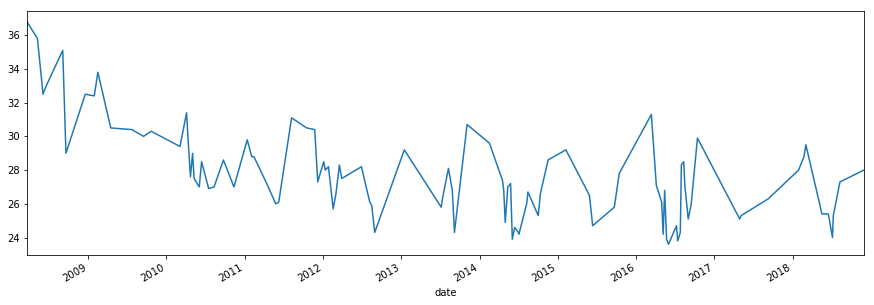

In [19]:
%matplotlib inline

temp = valid_races.loc[valid_races.horseid == 48576]
temp = temp.set_index('date')
temp['kmtime'].plot(figsize=(15,5));

In [20]:
races.head()

,horseid,date,circuit,race,track,distance,tillagg,placement,time,odds,driver,verklspar,kmtime,int_placement
id,,,,,,,,,,,,,,
1356901.0,591.0,2009-01-22,G,8.0,7.0,L,1.0,0,179,651,Red Da,7.0,17.9,10.0
1355774.0,51169.0,2009-01-09,B,2.0,11.0,M,0.0,3,190,100,Hol PÅ,11.0,19.0,3.0
1356818.0,39640.0,2009-01-08,Ö,4.0,5.0,K,0.0,6,174a,37,Kon Jo,5.0,NaN,6.0
1355772.0,51743.0,2009-01-09,B,2.0,2.0,M,0.0,0,200,80,Wal Kr,2.0,20.0,10.0
1366458.0,41394.0,2009-02-18,S,5.0,15.0,M,1.0,0,166,1211,Lar FB,9.0,16.6,10.0


In [32]:
temp = races.reset_index().drop_duplicates(subset=['id', 'horseid'])
temp.groupby(temp.date)['id'].count().sort_index(ascending=False).head(25)

date
2019-02-22    326
2019-02-21    255
2019-02-20     78
2019-02-19    137
2019-02-18     29
2019-02-17    200
2019-02-16    238
2019-02-15    249
2019-02-14    139
2019-02-13    179
2019-02-12    107
2019-02-11    102
2019-02-10    158
2019-02-09    187
2019-02-08    216
2019-02-07    194
2019-02-06    204
2019-02-05    158
2019-02-04    172
2019-02-03    160
2019-02-02    272
2019-02-01    252
2019-01-31    183
2019-01-30    250
2019-01-29    179
Name: id, dtype: int64

In [35]:
races.shape

(2559817, 14)

In [36]:
races.date.min()

Timestamp('2001-01-01 00:00:00')

In [37]:
races.date.max()

Timestamp('2019-02-22 00:00:00')

In [47]:
races.odds = pd.to_numeric(races.odds, errors='coerce')/10

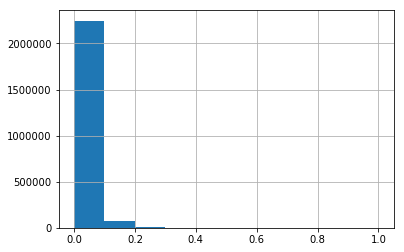

In [48]:
races.odds.hist();